<a href="https://colab.research.google.com/github/dondreojordan/Project-Notebook-Code/blob/master/Spotify_Features_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Colab Notes 
(Use this space to record any notes during drafting. Remove before final draft)

**To-Do:**
Learn code to separate tracks by genre and graph using

>Fine Tune Graphs being used for blog post

>For reference, number graphs

>Learn another way to have the dataset so it is not in your local files

>


In [110]:
import plotly

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import random
import math
from sklearn import preprocessing

from numpy import array
from numpy import mean
from numpy import std
from numpy import cov
from numpy.linalg import eig

In [112]:
#Loaded dataset form files. 

from google.colab import files
uploaded = files.upload()

Saving SpotifyFeatures.csv to SpotifyFeatures (1).csv


In [113]:
spotifyfeatures_original = pd.read_csv('SpotifyFeatures.csv')
# pd.read()
spotifyfeatures = spotifyfeatures_original.copy()
# Make a copy of the original dataset
df = spotifyfeatures
# Test dataset Copy

print("Spotify Features Dataframe Shape: ", spotifyfeatures_original.shape)
spotifyfeatures_original

# Spotifyfeatures head/tail

Spotify Features Dataframe Shape:  (232725, 18)


genre               artist_name  ... time_signature valence
0       Movie            Henri Salvador  ...            4/4   0.814
1       Movie         Martin & les fées  ...            4/4   0.816
2       Movie           Joseph Williams  ...            5/4   0.368
3       Movie            Henri Salvador  ...            4/4   0.227
4       Movie              Fabien Nataf  ...            4/4   0.390
...       ...                       ...  ...            ...     ...
232720   Soul                     Slave  ...            4/4   0.962
232721   Soul  Jr Thomas & The Volcanos  ...            4/4   0.969
232722   Soul              Muddy Waters  ...            4/4   0.813
232723   Soul                   R.LUM.R  ...            4/4   0.489
232724   Soul            Mint Condition  ...            4/4   0.479

[232725 rows x 18 columns]

In [114]:
spotifyfeatures.columns

# Let's rename the column headers and use the .columns to match spelling.

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [115]:
spotifyfeatures.rename({'genre':'Genre', 'artist_name':'Artist', 'track_name':'Song', 'track_id':'Track ID', 'popularity':'Popularity',
       'acousticness':'Acousticness', 'danceability':'Danceability', 'duration_ms':'Song Duration, m/s', 'energy':'Energy',
       'instrumentalness':'Instrumentalness', 'key':'Key Signature', 'liveness':'Liveness', 'loudness':'Loudness', 'mode':'Mode',
       'speechiness':'Speechiness', 'tempo':'Tempo', 'time_signature':'Time Signature', 'valence':'Valence'}, axis=1, inplace=True)

# Code Renames columns for Root Spotify Features Dataset.

spotifyfeatures

Genre                    Artist  ... Time Signature Valence
0       Movie            Henri Salvador  ...            4/4   0.814
1       Movie         Martin & les fées  ...            4/4   0.816
2       Movie           Joseph Williams  ...            5/4   0.368
3       Movie            Henri Salvador  ...            4/4   0.227
4       Movie              Fabien Nataf  ...            4/4   0.390
...       ...                       ...  ...            ...     ...
232720   Soul                     Slave  ...            4/4   0.962
232721   Soul  Jr Thomas & The Volcanos  ...            4/4   0.969
232722   Soul              Muddy Waters  ...            4/4   0.813
232723   Soul                   R.LUM.R  ...            4/4   0.489
232724   Soul            Mint Condition  ...            4/4   0.479

[232725 rows x 18 columns]

In [116]:
spotifyfeatures_original.drop_duplicates(subset='track_name')
print('Shape after dropping: ', spotifyfeatures.shape)

# Drop duplicate tracks

Shape after dropping:  (232725, 18)


In [117]:
spotifyfeatures.drop(columns=['Track ID'], inplace=True)

# Removing unneccesary columns 

In [118]:
spotifyfeatures.describe()
# Spotify Features Statistics Features

Popularity   Acousticness  ...          Tempo        Valence
count  232725.000000  232725.000000  ...  232725.000000  232725.000000
mean       41.127502       0.368560  ...     117.666585       0.454917
std        18.189948       0.354768  ...      30.898907       0.260065
min         0.000000       0.000000  ...      30.379000       0.000000
25%        29.000000       0.037600  ...      92.959000       0.237000
50%        43.000000       0.232000  ...     115.778000       0.444000
75%        55.000000       0.722000  ...     139.054000       0.660000
max       100.000000       0.996000  ...     242.903000       1.000000

[8 rows x 11 columns]

In [119]:
spotifyfeatures.describe(exclude='number')
# Spotify Features Categorical Feautres

Genre          Artist    Song Key Signature    Mode Time Signature
count   232725          232725  232725        232725  232725         232725
unique      27           14564  148615            12       2              5
top     Comedy  Giuseppe Verdi    Home             C   Major            4/4
freq      9681            1394     100         27583  151744         200760

In [120]:
spotifyfeatures.columns

Index(['Genre', 'Artist', 'Song', 'Popularity', 'Acousticness', 'Danceability',
       'Song Duration, m/s', 'Energy', 'Instrumentalness', 'Key Signature',
       'Liveness', 'Loudness', 'Mode', 'Speechiness', 'Tempo',
       'Time Signature', 'Valence'],
      dtype='object')

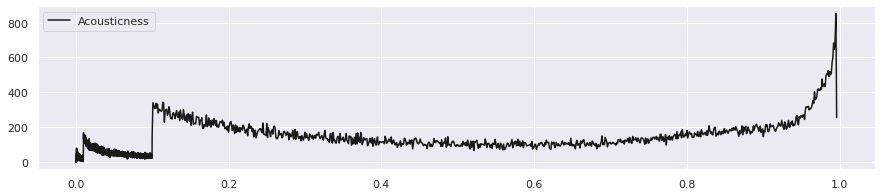

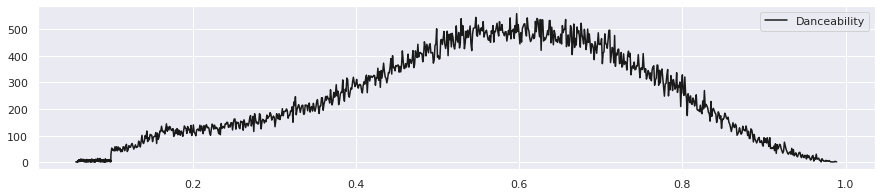

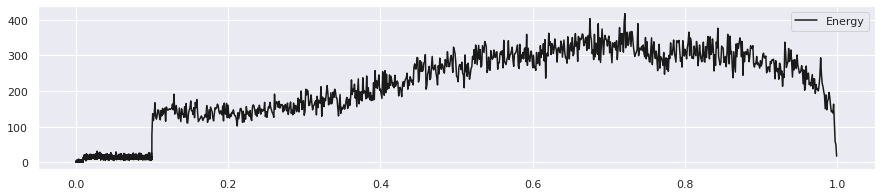

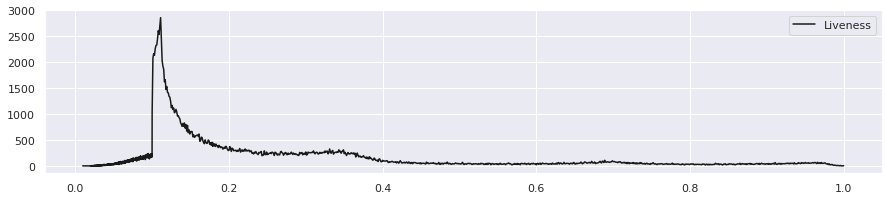

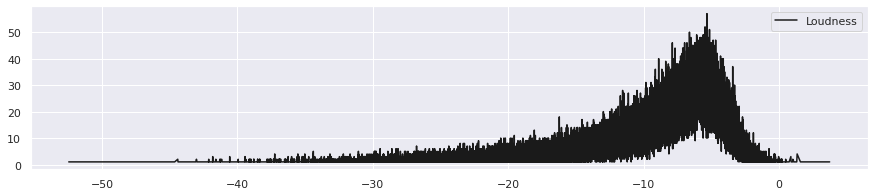

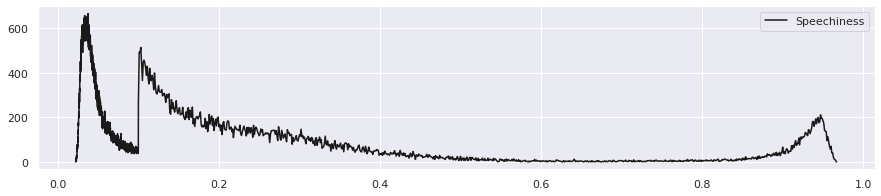

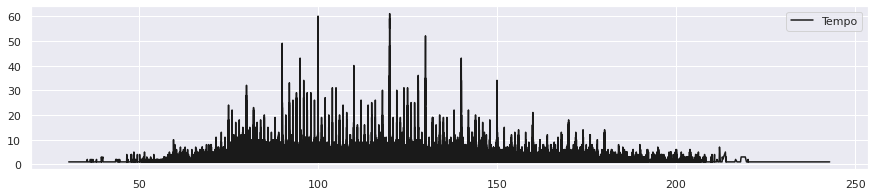

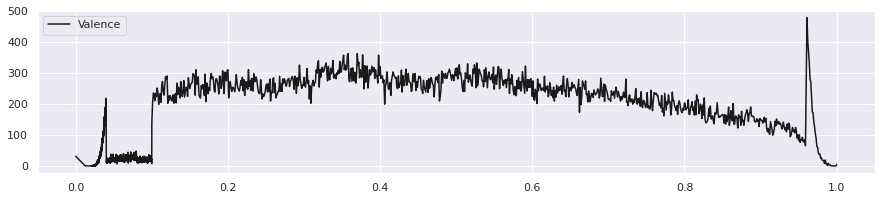

In [121]:
Acousticness = spotifyfeatures['Acousticness'].value_counts().sort_index()
Acousticness_df = pd.DataFrame(data=Acousticness)
Acousticness_df.plot(figsize=(15,3), color='k');
# Acousticness
# A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 
# 1.0 represents high confidence the track is acoustic. 

Danceability = spotifyfeatures['Danceability'].value_counts().sort_index()
Danceability_df = pd.DataFrame(data=Danceability)
Danceability_df.plot(figsize=(15,3), color='k');
# Danceability
# A value of 0.0 is least danceable and 1.0 is most danceable. 
# Danceability describes how suitable a track is for dancing based on a combination of musical elements 
# including tempo, rhythm stability, beat strength, and overall regularity. 

Energy = spotifyfeatures['Energy'].value_counts().sort_index()
Energy_df = pd.DataFrame(data=Energy)
Energy_df.plot(figsize=(15,3), color='k');
# Energy
# Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. 

# Typically, energetic tracks feel fast, loud, and noisy. 
# For example, death metal has high energy, while a Bach prelude scores low on the scale. 
# Perceptual features contributing to this attribute include dynamic range, perceived loudness,
# timbre, onset rate, and general entropy. 

Liveness = spotifyfeatures['Liveness'].value_counts().sort_index()
Liveness_df = pd.DataFrame(data=Liveness)
Liveness_df.plot(figsize=(15,3), color='k');
# Liveness
#	Detects the presence of an audience in the recording. 
# Higher liveness values represent an increased probability that the track was performed live. 
# A value above 0.8 provides strong likelihood that the track is live. 

Loudness = spotifyfeatures['Loudness'].value_counts().sort_index()
Loudness_df = pd.DataFrame(data=Loudness)
Loudness_df.plot(figsize=(15,3), color='k');
# Loudness
# The overall loudness of a track in decibels (dB). 
# Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. 
# Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude).
# Values typical range between -60 and 0 db.

Speechiness = spotifyfeatures['Speechiness'].value_counts().sort_index()
Speechiness_df = pd.DataFrame(data=Speechiness)
Speechiness_df.plot(figsize=(15,3), color='k');
# Speechiness
#	Speechiness detects the presence of spoken words in a track. 
# The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. 
# Values above 0.66 describe tracks that are probably made entirely of spoken words. 
# Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. 
# Values below 0.33 most likely represent music and other non-speech-like tracks.

Tempo = spotifyfeatures['Tempo'].value_counts().sort_index()
Tempo_df = pd.DataFrame(data=Tempo)
Tempo_df.plot(figsize=(15,3), color='k');
# Tempo
# The overall estimated tempo of a track in beats per minute (BPM). 
# In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 

Valence = spotifyfeatures['Valence'].value_counts().sort_index()
Valence_df = pd.DataFrame(data=Valence)
Valence_df.plot(figsize=(15,3), color='k');
# Valence
# A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 
# Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 


######### Spotify Feature Attributes Graphed ###########

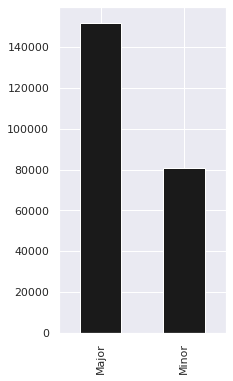

In [122]:
df['Mode'].value_counts().sort_index().plot.bar(figsize=(3,6),color='k');

# Major / Minor Mode:

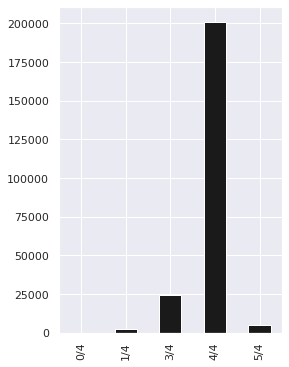

In [123]:
df['Time Signature'].value_counts().sort_index().plot.bar(figsize=(4,6),color='k');

# An estimated overall time signature of a track. 
# The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
# The distribution of values for this feature look like this:

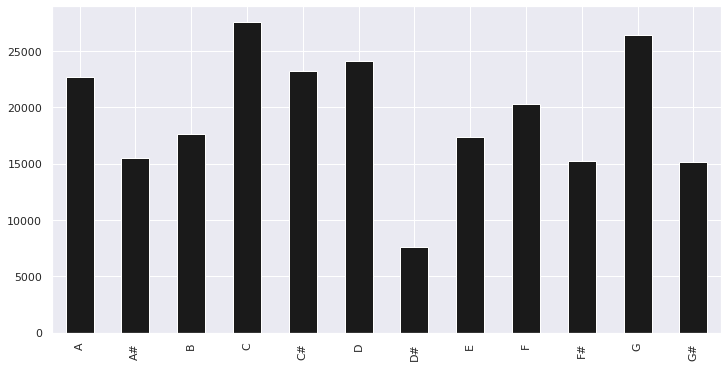

In [124]:
df['Key Signature'].value_counts().sort_index().plot.bar(figsize=(12,6),color='k');

# The estimated overall key of the track. Integers map to pitches using standard Pitch Class Notation.

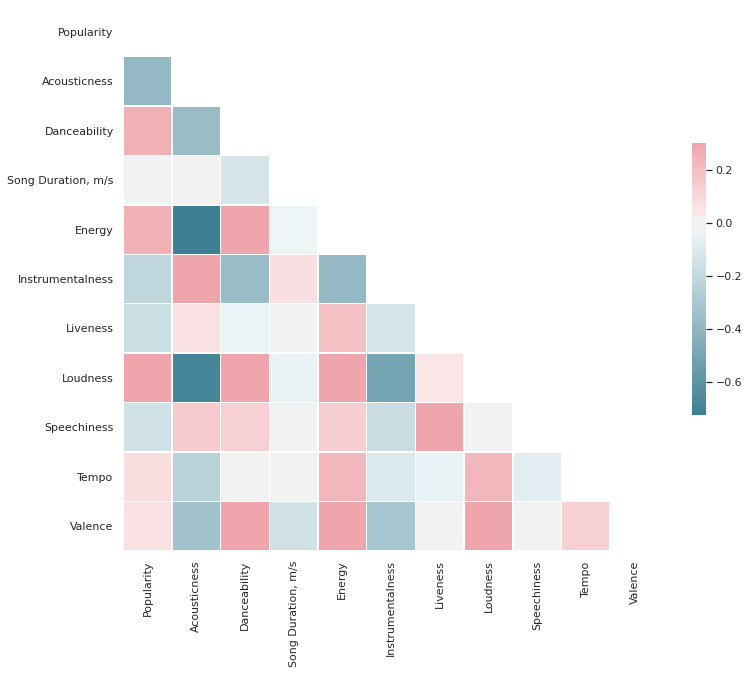

In [125]:

sns.set(style="white")
# Generate a large random dataset
d = spotifyfeatures
# Compute the correlation matrix
corr = d.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=False, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [129]:
#Test Sample

from random import sample

test_one =  spotifyfeatures.sample(500)

test_two =  spotifyfeatures.sample(5000)

test_three =  spotifyfeatures.sample(100000)

In [130]:
test_one

Genre                   Artist  ... Time Signature  Valence
111083               Pop                      112  ...            4/4    0.768
215948           Country           Langhorne Slim  ...            4/4    0.712
124494         Classical    Johann Sebastian Bach  ...            4/4    0.651
99549   Children’s Music  Rainbow Kitten Surprise  ...            4/4    0.430
101644  Children’s Music           In This Moment  ...            4/4    0.196
...                  ...                      ...  ...            ...      ...
71613              Blues                 The Band  ...            4/4    0.287
48899              Blues        Black Pistol Fire  ...            4/4    0.205
16168              Dance                     MNEK  ...            4/4    0.673
4331             Country               Sara Evans  ...            4/4    0.577
198190        Soundtrack             Marc Shaiman  ...            4/4    0.175

[500 rows x 17 columns]

In [131]:
import plotly.express as px
test = test_one
fig = px.scatter_3d(test, x='Valence', y='Energy', z='Danceability',
                    color='Popularity')
fig.show()

# 3D scatterplot of a random sample from dataset

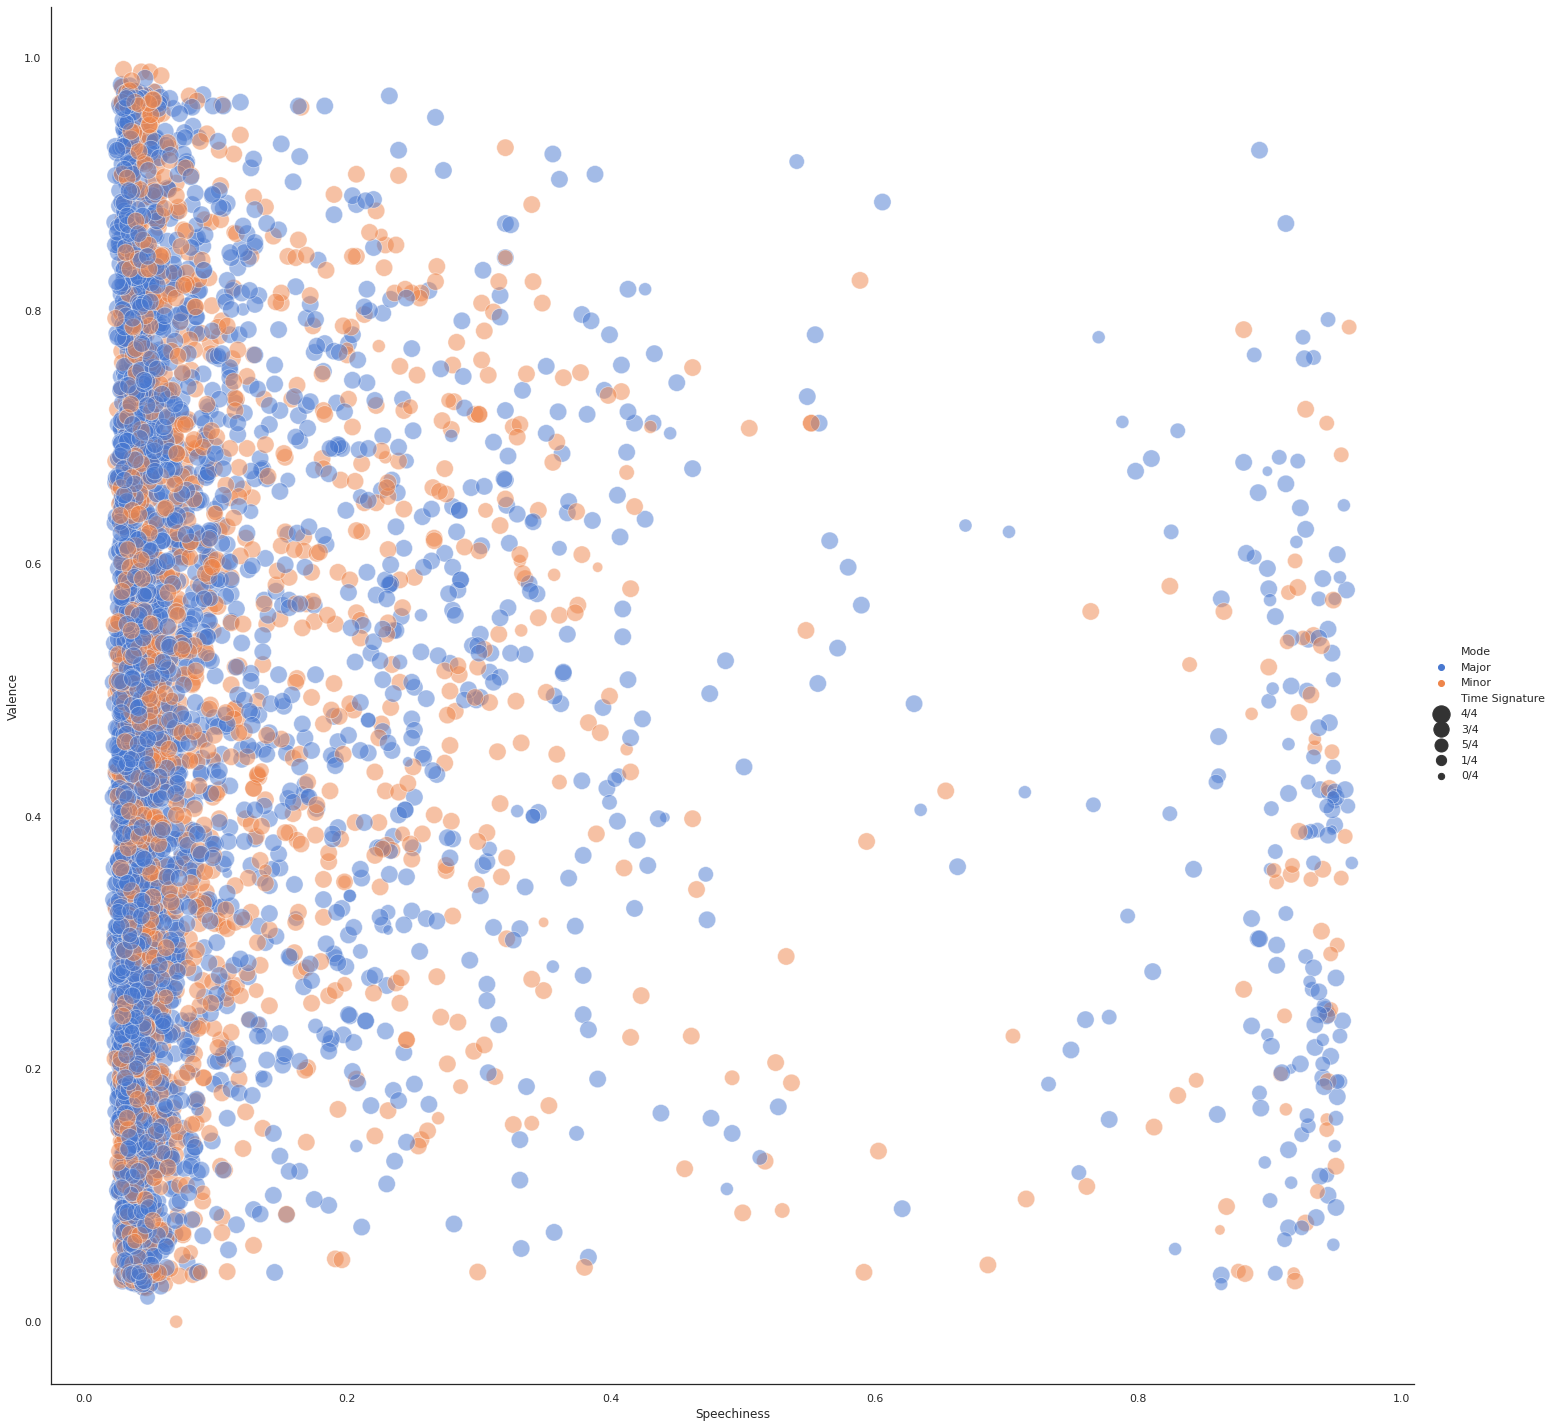

In [133]:
import seaborn as sns
sns.set(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Speechiness", y="Valence", hue="Mode", size="Time Signature",
            sizes=(40, 300), alpha=.5, palette="muted",
            height=20, data=test_two)

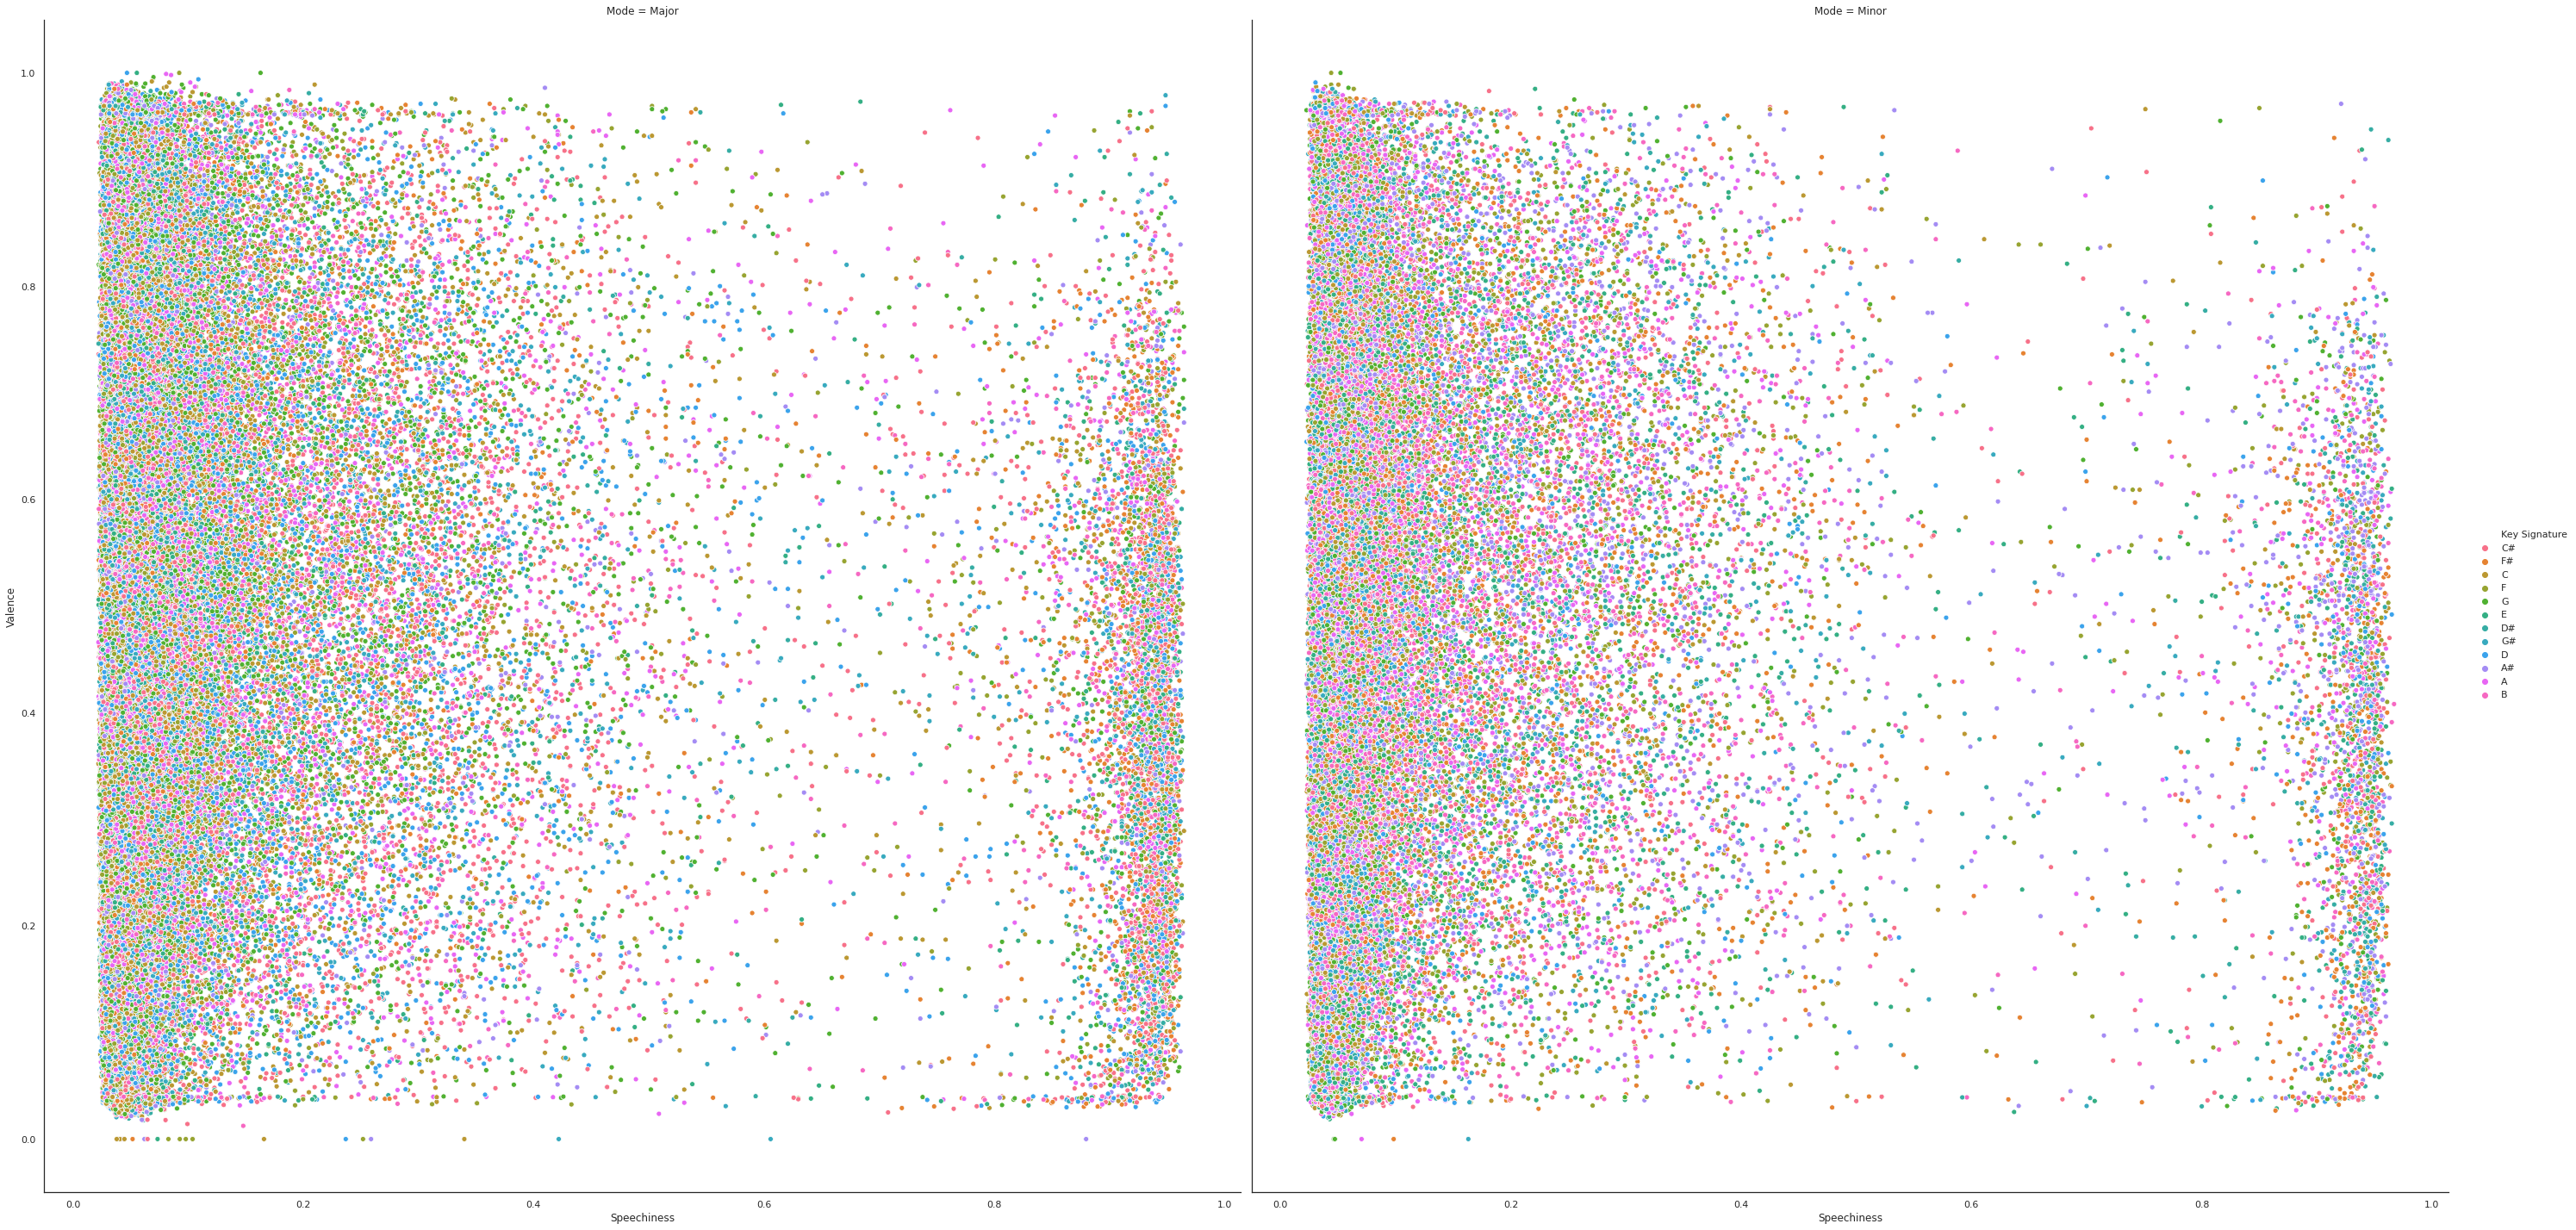

In [134]:
sns.relplot(x="Speechiness", y="Valence", hue="Key Signature",
            col="Mode", data=spotifyfeatures, height=20);

In [135]:
spotcopy = spotifyfeatures.copy()
spotcopy.drop(columns=['Popularity','Song Duration, m/s','Loudness','Tempo'], inplace=True)

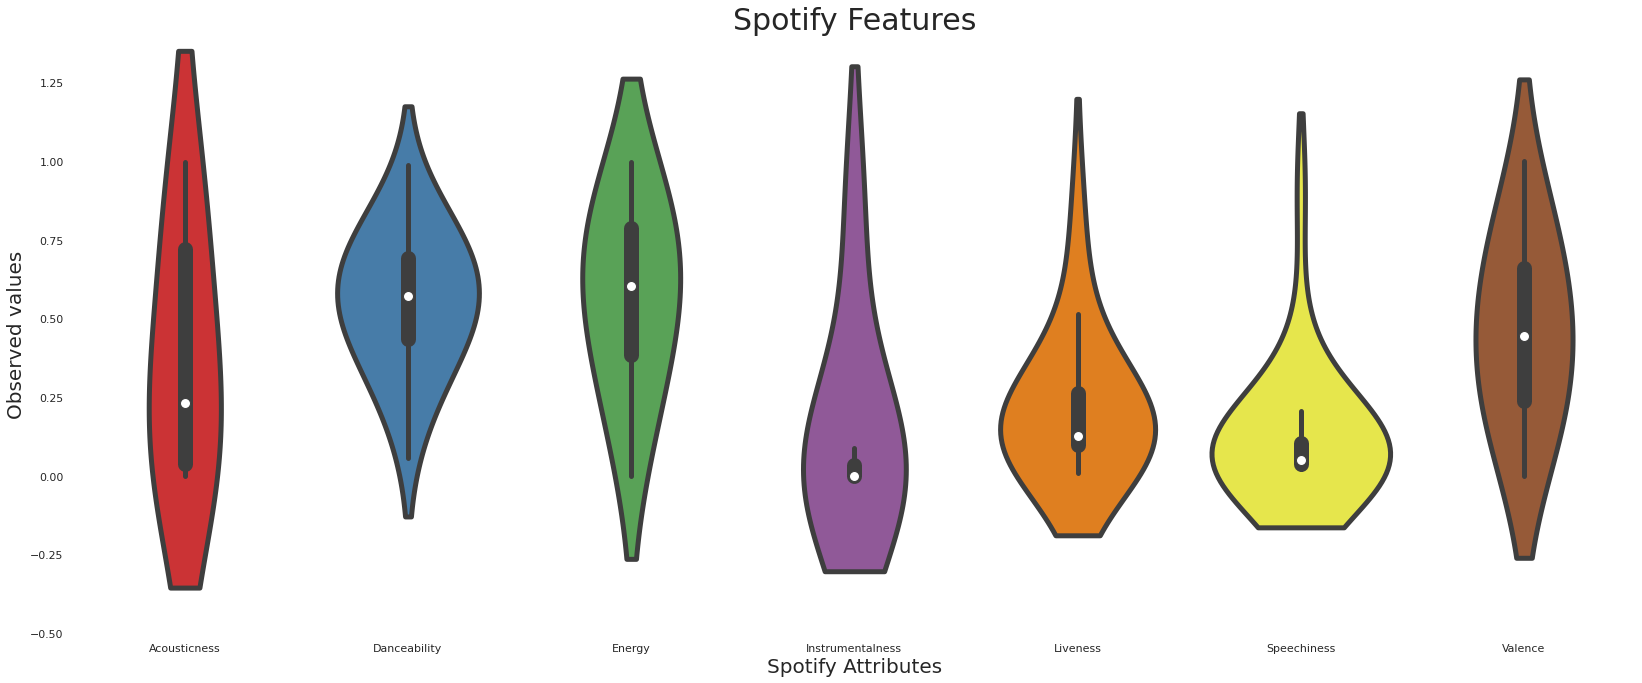

In [136]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 11))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=spotcopy, palette="Set1", bw=1, cut=1, linewidth=5, color='r')

ax.set_title('Spotify Features',fontsize=30)
ax.set_ylabel('Observed values',fontsize=20)
ax.set_xlabel('Spotify Attributes',fontsize=20)


ax.set_facecolor('white')
ax.set_alpha(1)

# Finalize the figure
ax.set(ylim=(-.50, 1.4))
sns.despine(left=True, bottom=True)

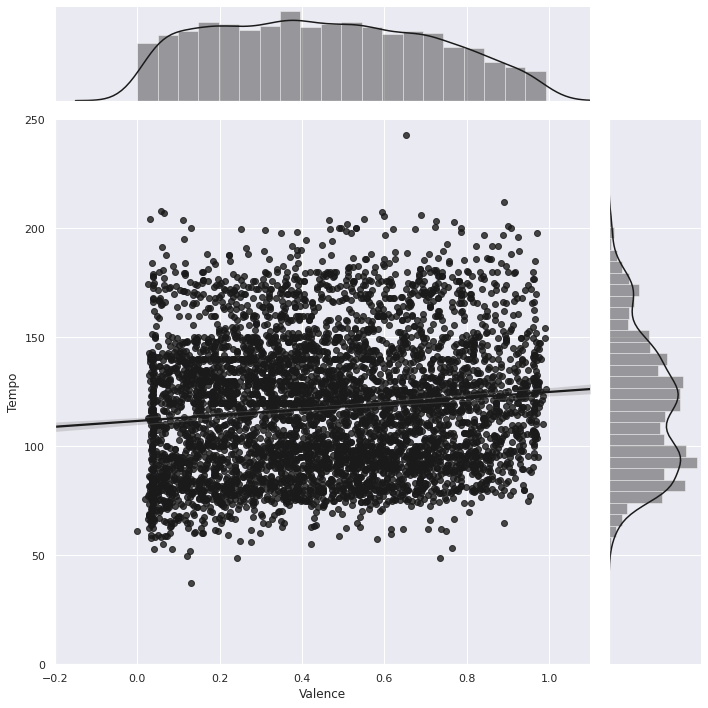

In [137]:
import seaborn as sns
sns.set(style="darkgrid")

tips = []
g = sns.jointplot("Valence", "Tempo", data=test_two,
                  kind="reg", truncate=False,
                  xlim=(-.2, 1.1), ylim=(0, 250),
                  color="k", height=10)

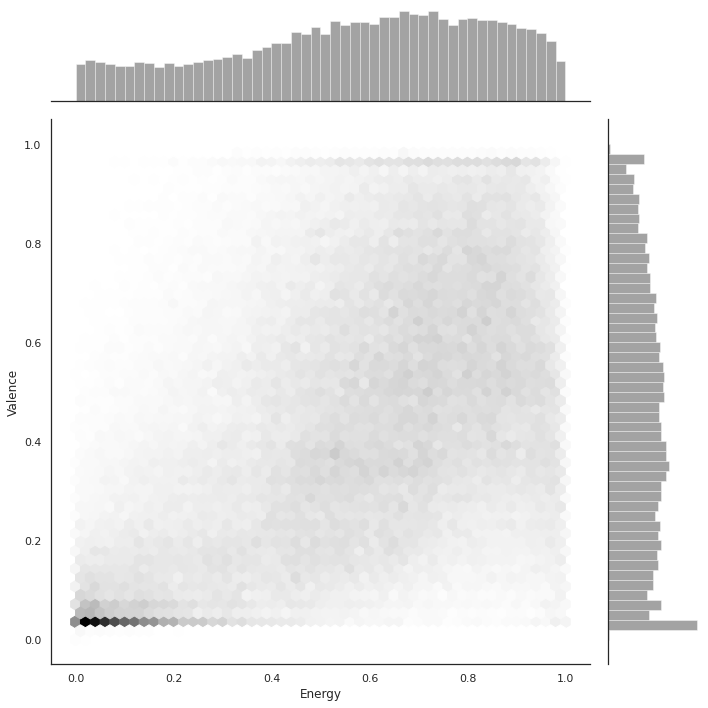

In [138]:
with sns.axes_style("white"):
    sns.jointplot('Energy', 'Valence', kind="hex", color="k",height=10,data=spotifyfeatures);

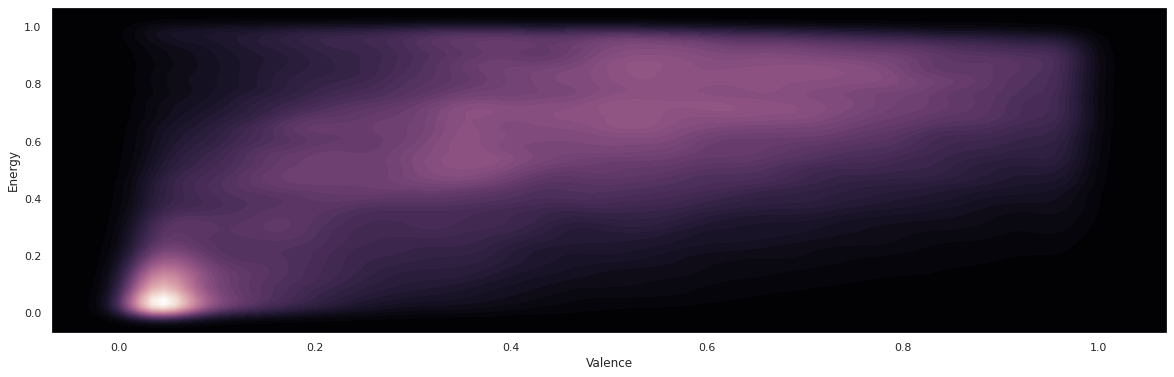

In [140]:
f, ax = plt.subplots(figsize=(20, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.Valence, df.Energy, cmap=cmap, n_levels=60, shade=True);